# Classification models

The dataset will be from: https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets?select=churn-bigml-20.csv

Which has a traning and testing set already divided with the training set being roughly 2,500 samples.

In [96]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

train_data = pd.read_csv('data/churn-bigml-80.csv')
test_data = pd.read_csv('data/churn-bigml-20.csv')

train_data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Preprocessing the data

In [97]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

target = ["Churn"]

def one_hot(data):
    ''' this converts international plan and voice mail plan to numbers as opposed to T/F '''
    binary_data = data.loc[:, data.nunique() == 2]
    encoder = OneHotEncoder(drop='if_binary', sparse_output=False)
    encoded_values = encoder.fit_transform(binary_data)
    encoded_df = pd.DataFrame(encoded_values, columns=binary_data.columns)
    return data.drop(columns=binary_data.columns).join(encoded_df)


def handle_non_numeric(data):
    ''' this gets rid of the state column '''
    return data.select_dtypes(include=['number'])


preprocess_pipeline = Pipeline([
    ('one_hot_binary_labels', FunctionTransformer(one_hot)),   # Converts binary labels to 0 or 1
    ('non_numeric', FunctionTransformer(handle_non_numeric))  # Handle non-numeric fields
])

training_data_y = train_data[target]

training_data_x = preprocess_pipeline.fit_transform(train_data.drop(target, axis=1))
# training_data_x = train_data.drop(target, axis=1)

# print(training_data_x)
training_data_x.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,International plan,Voice mail plan
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0.0,1.0
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0.0,1.0
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0.0,0.0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1.0,0.0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1.0,0.0


In [98]:
testing_data_y = test_data[target]
testing_data_x = preprocess_pipeline.fit_transform(test_data.drop(target, axis=1))

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

knn = KNeighborsClassifier()
scaler = StandardScaler()

scaled_train_x = scaler.fit_transform(training_data_x)
scaled_test_x = scaler.transform(testing_data_x)

knn = knn.fit(scaled_train_x, training_data_y)
knn_preds = knn.predict(scaled_test_x)
print(confusion_matrix(testing_data_y, knn_preds))
print("Accuracy: ", accuracy_score(testing_data_y, knn_preds))

[[566   6]
 [ 63  32]]
Accuracy:  0.896551724137931


c:\Users\Christopher Luce\.conda\envs\machine-learning\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


I wanted to try out the AdaBoostClassifier, changing n_estimators didn't lead to significant performance nor did learning_rate

c:\Users\Christopher Luce\.conda\envs\machine-learning\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[549  23]
 [ 49  46]]
Accuracy:  0.8920539730134932



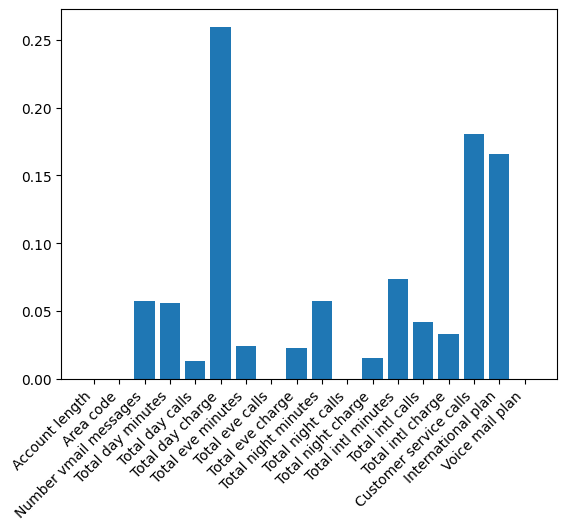

In [113]:
from sklearn.ensemble import AdaBoostClassifier

adac = AdaBoostClassifier(random_state=0) # for consistent results

adac.fit(training_data_x, training_data_y)
preds = adac.predict(testing_data_x)

print(confusion_matrix(testing_data_y, preds))
print("Accuracy: ", accuracy_score(testing_data_y, preds))

plt.bar(testing_data_x.columns, adac.feature_importances_)
plt.xticks(rotation=45, ha="right")
print()

c:\Users\Christopher Luce\.conda\envs\machine-learning\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[[567   5]
 [ 23  72]]
Accuracy:  0.9580209895052474



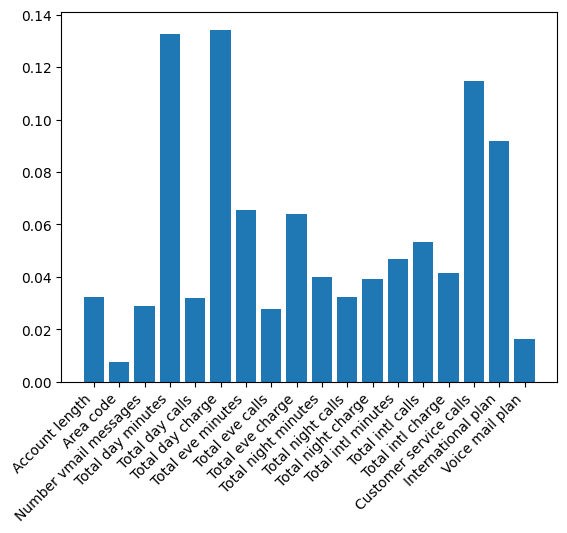

In [101]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100, random_state=0)

clf_rf = clf_rf.fit(training_data_x, training_data_y)
clf_preds = clf_rf.predict(testing_data_x)
print(confusion_matrix(testing_data_y, clf_preds))
print("Accuracy: ", accuracy_score(testing_data_y, clf_preds))

plt.bar(training_data_x.columns, clf_rf.feature_importances_)
plt.xticks(rotation=45, ha="right")
print()